# Decision Tree

Decision Trees are a popular machine learning algorithm used for both classification and regression tasks. They are simple yet powerful models that mimic human decision-making processes by dividing data into distinct segments based on specific criteria. These criteria are determined through a series of binary decisions at each node of the tree, leading to a tree-like structure. Decision Trees are easy to understand and interpret, making them valuable for explaining the reasoning behind a model's predictions.

One key advantage of Decision Trees is their ability to handle both categorical and numerical features, making them versatile for various types of data. They can be used for tasks such as diagnosing medical conditions, customer churn prediction, and even game strategy optimization.

However, Decision Trees are prone to overfitting when they become overly complex. To mitigate this, techniques like pruning and setting appropriate hyperparameters are employed. Additionally, they may not perform as well as more advanced algorithms on complex datasets with intricate relationships.

Decision Trees are intuitive and interpretable models that are widely used in machine learning, especially when transparency and explainability are essential in decision-making processes.

Decision trees are constructed from only two elements — nodes and branches.

## Algorithm

Initialization: Start with the entire dataset at the root node.

Attribute Selection: Select the best attribute (feature) to split the data at the current node. Common criteria include Information Gain, Gini Impurity, or Mean Squared Error.

Splitting: Divide the dataset into subsets based on the chosen attribute's values.
Recursive Process: Recursively apply the attribute selection and splitting steps to create a tree-like structure.

Stopping Criteria: Determine when to stop the splitting process, typically based on factors like maximum depth, minimum samples per leaf, or purity threshold.

Leaf Nodes: Assign a class label or regression value to the leaf nodes based on the majority class or mean value of the samples in that leaf.

## Data Process

In [ ]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = '/Users/kevinwang/Downloads/Housing.csv'
housing_data = pd.read_csv(file_path)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
le = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
housing_data_encoded = housing_data.copy()
for col in categorical_cols:
    housing_data_encoded[col] = le.fit_transform(housing_data[col])

# Splitting the dataset into training and testing sets
X = housing_data_encoded.drop('price', axis=1)
y = housing_data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Evaluating the model
train_score = decision_tree_model.score(X_train, y_train)
test_score = decision_tree_model.score(X_test, y_test)

print(f"train score: {train_score}") 
print(f"test score: {test_score}")

train score: 0.9985402884288594
test score: 0.4681689010023007


## Visualization

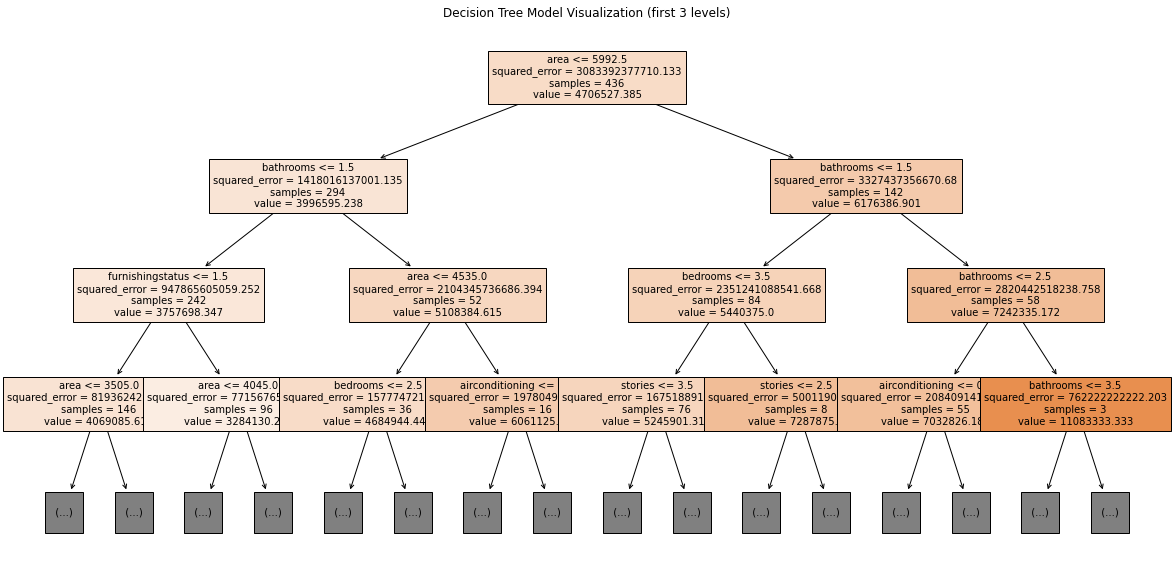

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.title('Decision Tree Model Visualization (first 3 levels)')
plt.show()

The feature that appears at the top is the most important one for splitting the data according to the decision tree. In this case, it's likely a feature that the model found most effective in dividing the house prices into higher and lower values. Each node in the tree represents a condition on a feature that splits the data into two groups.

Each branching (or node) shows a decision made on a single feature, which can tell you about the features that are most influential in determining house prices according to the model. For instance, it might split based on the area of the property, number of bathrooms, or whether the house has air conditioning, indicating these features significantly impact the price.

At the ends of the branches you can see leaf nodes, which represent the output values (in this case, the predicted prices or price categories). The depth of each leaf node (how far it is from the root) and its color (darker colors typically indicate higher values) help indicate the complexity and the outcome of decisions made along that path.

If shown, this metric helps to understand the purity of the node. A lower Gini index at a node indicates that the data points in that node are very similar to each other in terms of the target variable (price), which suggests a good split. This metric is more common in classification problems but can be adapted or replaced by other criteria in regression trees.

Each node also indicates the number of samples that fall into that category. This is useful for understanding the distribution of data across different decisions and seeing how much data supports each decision in the tree.

## Conclusion

The decision tree model showed very high performance on the training set (approximately 99.85% accuracy), but significantly lower performance on the testing set (around 46.82%). This discrepancy suggests that the model is overfitting, meaning it is too closely fitted to the training data and may not generalize well to unseen data.

The decision tree plot revealed that certain features are particularly influential in predicting house prices. The splits in the first few levels of the tree indicate the top criteria used by the model, which likely include variables like the area of the house, the presence of air conditioning, and perhaps other features like the number of bathrooms or parking spaces. These features are crucial determinants of house prices according to the model.